Daniela Donado, Sarita Castañeda, Laura Alvarez, Juan Pablo

Importamos las librerias  a utilizar y cargamos los datos

In [ ]:
import numpy as np # la necesitamos para operar con vectores y cargar el txt
import matplotlib.pyplot as plt # es necesario para graficar
import pandas as pd # la necesitamos para manejar dataframes

datos = np.genfromtxt("Acero_J_8am.txt", delimiter="\t", skip_header=0, skip_footer=0)
datos = np.delete(datos, [0, 2], axis=0)



Definimos las variables

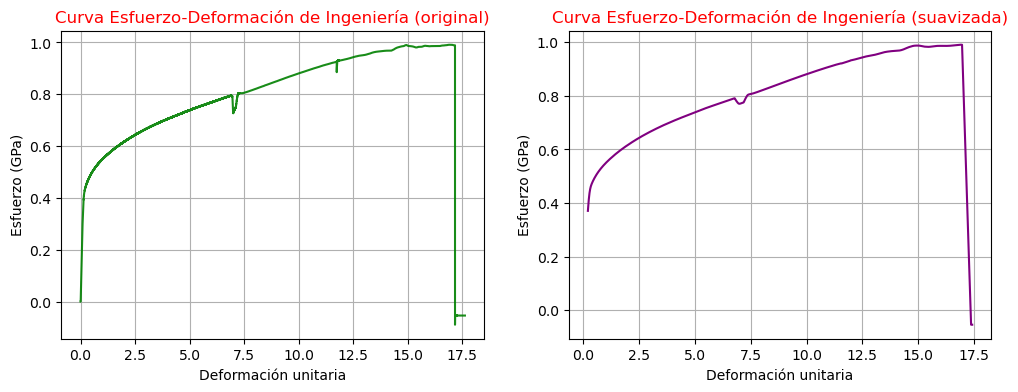

In [225]:
# Definimos las variables
area = (12.12*0.55)  # en mm
area_metros= area*1e-6
long_ini = 50  # en mm

fuerza_N = datos[:, 1]
fuerza_Kn= fuerza_N / 1000  # en kN
esfuerzo = fuerza_Kn / area_metros  # en kN/m² kilopascales
esfuerzo_gigapascales= esfuerzo/1e6 # Giga Pascales
deformacion = datos[:, 0] / long_ini  # Adimensional

#Suavizamos la curva
df = pd.DataFrame({
    "deformacion": datos[:,0] / long_ini,
    "esfuerzo": esfuerzo_gigapascales
})

df["deformacion_suav"] = df["deformacion"].rolling(window=2000).mean()
df["esfuerzo_suav"] = df["esfuerzo"].rolling(window=2000).mean()

# Graficamos
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(df["deformacion"], df["esfuerzo"], color="green", alpha=0.9, label="Original")
ax2.plot(df["deformacion_suav"], df["esfuerzo_suav"], color="purple")
ax1.set_title("Curva Esfuerzo-Deformación de Ingeniería (original)", fontsize=12, color="red")
ax1.set_xlabel("Deformación unitaria")
ax1.set_ylabel("Esfuerzo (GPa)")
ax1.grid()

ax2.set_title("Curva Esfuerzo-Deformación de Ingeniería (suavizada)", fontsize=12, color="red")
ax2.set_xlabel("Deformación unitaria")
ax2.set_ylabel("Esfuerzo (GPa)")
ax2.grid()

plt.show()



El material observado corresponde a una probeta de acero inoxidable. La curva esfuerzo–deformación de Ingeniería evidencia una zona elástica relativamente corta, con un módulo de elasticidad de 3.25 GPa. Esta alta pendiente nos indica que es un material rígido con baja capacidad de deformación reversible, por lo que podemos concluir que su capacidad para absorber energía en la región elástica es muy limitada (factor que evidenciamos por su módulo de resiliencia de 0.02GPa).

Por otro lado, el material presenta una amplia zona plástica, lo que demuestra su comportamiento dúctil con una elongación del 68.34%. Finalmente, se evidencia en la gráfica que al alcanzar la resistencia a la tracción, el material se fractura casi inmediatamente presentando una fractura plana.               

**Cálculo Módulo de elasticidad**



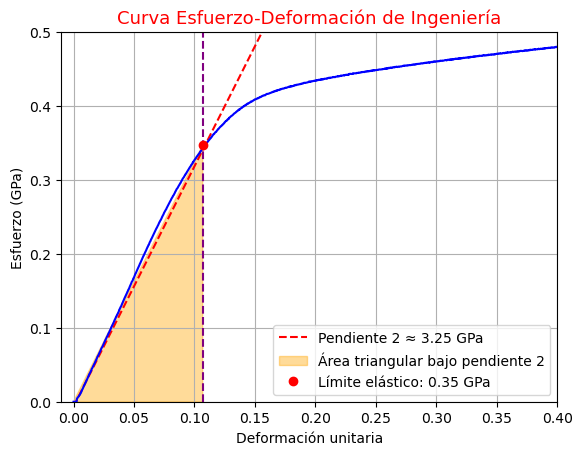

Modulo de Elasticidad:3.25 GPa
Límite de elasticidad: 0.347 GPa a una deformación de 0.107
Área del triángulo sombreado: 0.02 (MPa x deformación)


<Figure size 640x480 with 0 Axes>

In [267]:

#Cálculo Módulo de Young o de Elasticidad
A=  (0.02,0.06)
B= (0.1,0.32)
m=(B[1]-A[1])/(B[0]-A[0])

# Graficamos la curva esfuerzo-deformación con la pendiente
fig, ax = plt.subplots()

#Límite de elasticidad
x= np.linspace(0, 18, 10000)
b=0
d=0.002
y= m*(x-d)+ b
ax.plot(x, y, "--", color="red", label=f'Pendiente 2 ≈ {m:.2f} GPa')

#Intersección entre ambas rectas
m1 = m
b1 = A[1] - m * A[0]

m2=m
x_des = 0.002
b2 = (A[1]) - m2 * (A[0] + x_des)

#Punto de intersección
x0 = 0.10876
y0 =0.347
b = y0 - m * x0
x_interseccion = (y0/m)
ax.axvline(x_interseccion, color='purple', linestyle='--')

# Graficar la recta con solo dos puntos
ax.set_ylim(0, 0.5)
ax.set_xlim(-0.01,0.4)
ax.plot(deformacion, esfuerzo_gigapascales, color="blue", zorder=3)

esfuerzo_linea_roja = m * x_interseccion

# Coordenadas del triángulo
triangle_x = [0, x_interseccion, x_interseccion]
triangle_y = [0, esfuerzo_linea_roja, 0]

ax.fill(triangle_x, triangle_y, color='orange', alpha=0.4, label='Área triangular bajo pendiente 2')
ax.plot(0.107, 0.347, "ro", label=f'Límite elástico: {esfuerzo_linea_roja:.2f} GPa', zorder=7)


ax.set_title("Curva Esfuerzo-Deformación de Ingeniería", fontsize=13, color = "red")
ax.set_xlabel("Deformación unitaria")
ax.set_ylabel("Esfuerzo (GPa)")
ax.legend()

plt.grid()
plt.show()

plt.savefig("Curva_Def_esfuerzo.jpg", dpi = 1200,bbox_inches = "tight")

print(f"Modulo de Elasticidad:{m} GPa")
print(f"Límite de elasticidad: {esfuerzo_linea_roja:.3f} GPa a una deformación de {x_interseccion:.3f}")
area_triangulo = (m * x_interseccion**2) / 2
print(f"Área del triángulo sombreado: {area_triangulo:.2f} (MPa x deformación)")



**Cálculo Módulo de Resiliencia**

In [227]:
b= 0.10876
h= 0.347
Resiliencia= 0.5*h*b
print(f"El módulo de resiliencia es: {Resiliencia:.2f} GPa")

El módulo de resiliencia es: 0.02 GPa


**Cálculo Resistencia a la tracción**

In [228]:
resistencia_traccion= df["esfuerzo_suav"].max()
print(f"La resistencia a la tracción es: {resistencia_traccion:.2f} GPa")

La resistencia a la tracción es: 0.99 GPa


**Cálculo Elongación Total**

In [229]:
long_ini= 50
long_final= 84.17
Cambio_longitud= long_final - long_ini
elongacion_total= (Cambio_longitud/long_ini)*100
print(f"La elongación total es: {elongacion_total:.2f} %")

La elongación total es: 68.34 %


**Cálculo Límite de ruptura**

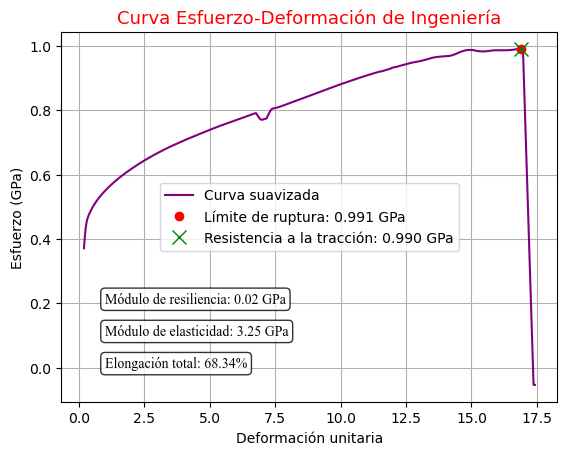

Límite de ruptura: 0.991 GPa


<Figure size 640x480 with 0 Axes>

In [268]:
# Índice del máximo esfuerzo suavizado
idx_max = np.argmax(df["esfuerzo_suav"])  

# Coordenadas del punto máximo
x_max = df["deformacion_suav"].iloc[idx_max]
y_max = df["esfuerzo_suav"].iloc[idx_max]

# Nueva área final
area_final = (9.86 * 0.35)  # mm²
area_metros = area_final * 1e-6

fig, ax = plt.subplots()

# Graficar curva suavizada
ax.plot(df["deformacion_suav"], df["esfuerzo_suav"], color="purple", label="Curva suavizada")

# Marcar el punto máximo
ax.plot(x_max, y_max, "ro", label=f"Límite de ruptura: {y_max:.3f} GPa", zorder=7)
ax.plot(16.910,0.99, 'x', markersize= 10, color='green', label=f'Resistencia a la tracción: {resistencia_traccion:.2f}0 GPa', zorder=20)
ax.text(1,0,f'Elongación total: {elongacion_total:.2f}%',rotation="horizontal",fontfamily = "times new roman", 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
ax.text(1,0.1,f'Módulo de elasticidad: {m:.2f} GPa',rotation="horizontal",fontfamily = "times new roman", 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
ax.text(1,0.2,f'Módulo de resiliencia: {Resiliencia:.2f} GPa',rotation="horizontal",fontfamily = "times new roman", 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
ax.set_title("Curva Esfuerzo-Deformación de Ingeniería", fontsize=13, color="red")
ax.set_xlabel("Deformación unitaria")
ax.set_ylabel("Esfuerzo (GPa)")
ax.legend()
plt.grid()
plt.show()
print(f"Límite de ruptura: {y_max:.3f} GPa")

plt.savefig("Curva_Def_esfuerzo2.jpg", dpi = 1200,bbox_inches = "tight")
